In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
data = pd.read_csv('Countries.csv')

In [3]:
means = data.groupby('Continent').mean()

In [4]:
medians = data.groupby('Continent').median()

In [5]:
counts = pd.DataFrame(data.groupby('Continent').count()['Country']).reindex(['South America','Central America and Caribbean','Oceania','Africa','North America','Asia','Europe','Middle East'])

In [6]:
variances = pd.DataFrame(data.groupby('Continent').var()['Crime Index']).reindex(['South America','Central America and Caribbean','Oceania','Africa','North America','Asia','Europe','Middle East'])

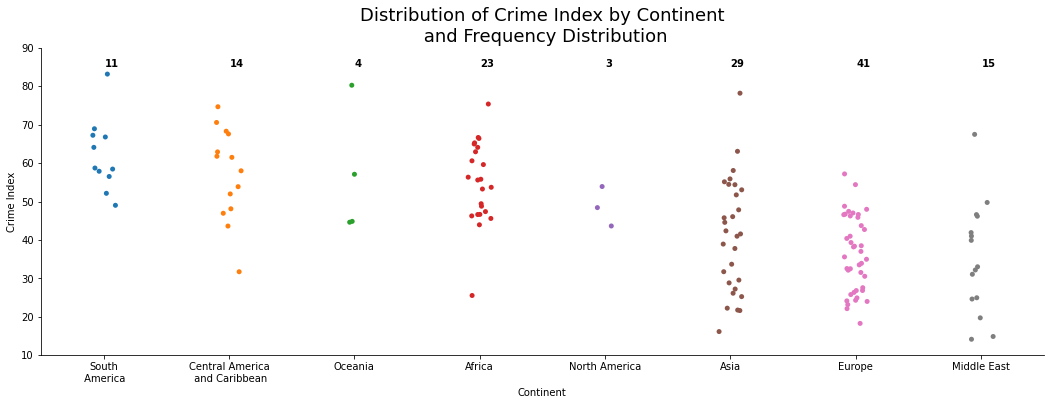

In [7]:
ax_cat = sns.catplot(data=data, x='Continent', y="Crime Index",order=['South America','Central America and Caribbean','Oceania','Africa','North America','Asia','Europe','Middle East'],legend = list(counts),height=5)
ax_cat.fig.set_figwidth(17)
ax_cat.fig.set_figheight(5)
ax_cat.ax.text(0,85,r"$\bf{" + str(counts['Country'][0]) + "}$")
ax_cat.ax.text(1,85,r"$\bf{" + str(counts['Country'][1]) + "}$")
ax_cat.ax.text(2,85,r"$\bf{" + str(counts['Country'][2]) + "}$")
ax_cat.ax.text(3,85,r"$\bf{" + str(counts['Country'][3]) + "}$")
ax_cat.ax.text(4,85,r"$\bf{" + str(counts['Country'][4]) + "}$")
ax_cat.ax.text(5,85,r"$\bf{" + str(counts['Country'][5]) + "}$")
ax_cat.ax.text(6,85,r"$\bf{" + str(counts['Country'][6]) + "}$")
ax_cat.ax.text(7,85,r"$\bf{" + str(counts['Country'][7]) + "}$")
ax_cat.set_yticklabels([a for a in range(10,100,10)])
ax_cat.set_xticklabels(['South\n America','Central America\n and Caribbean','Oceania','Africa','North America','Asia','Europe','Middle East'])
ax_cat.ax.set_title('Distribution of Crime Index by Continent\n and Frequency Distribution',fontsize=18)
#ax_cat.set(title='Distribution of Crime Index by Continent\n and Frequency')   
ax_cat.savefig('catplot.png', dpi=400)

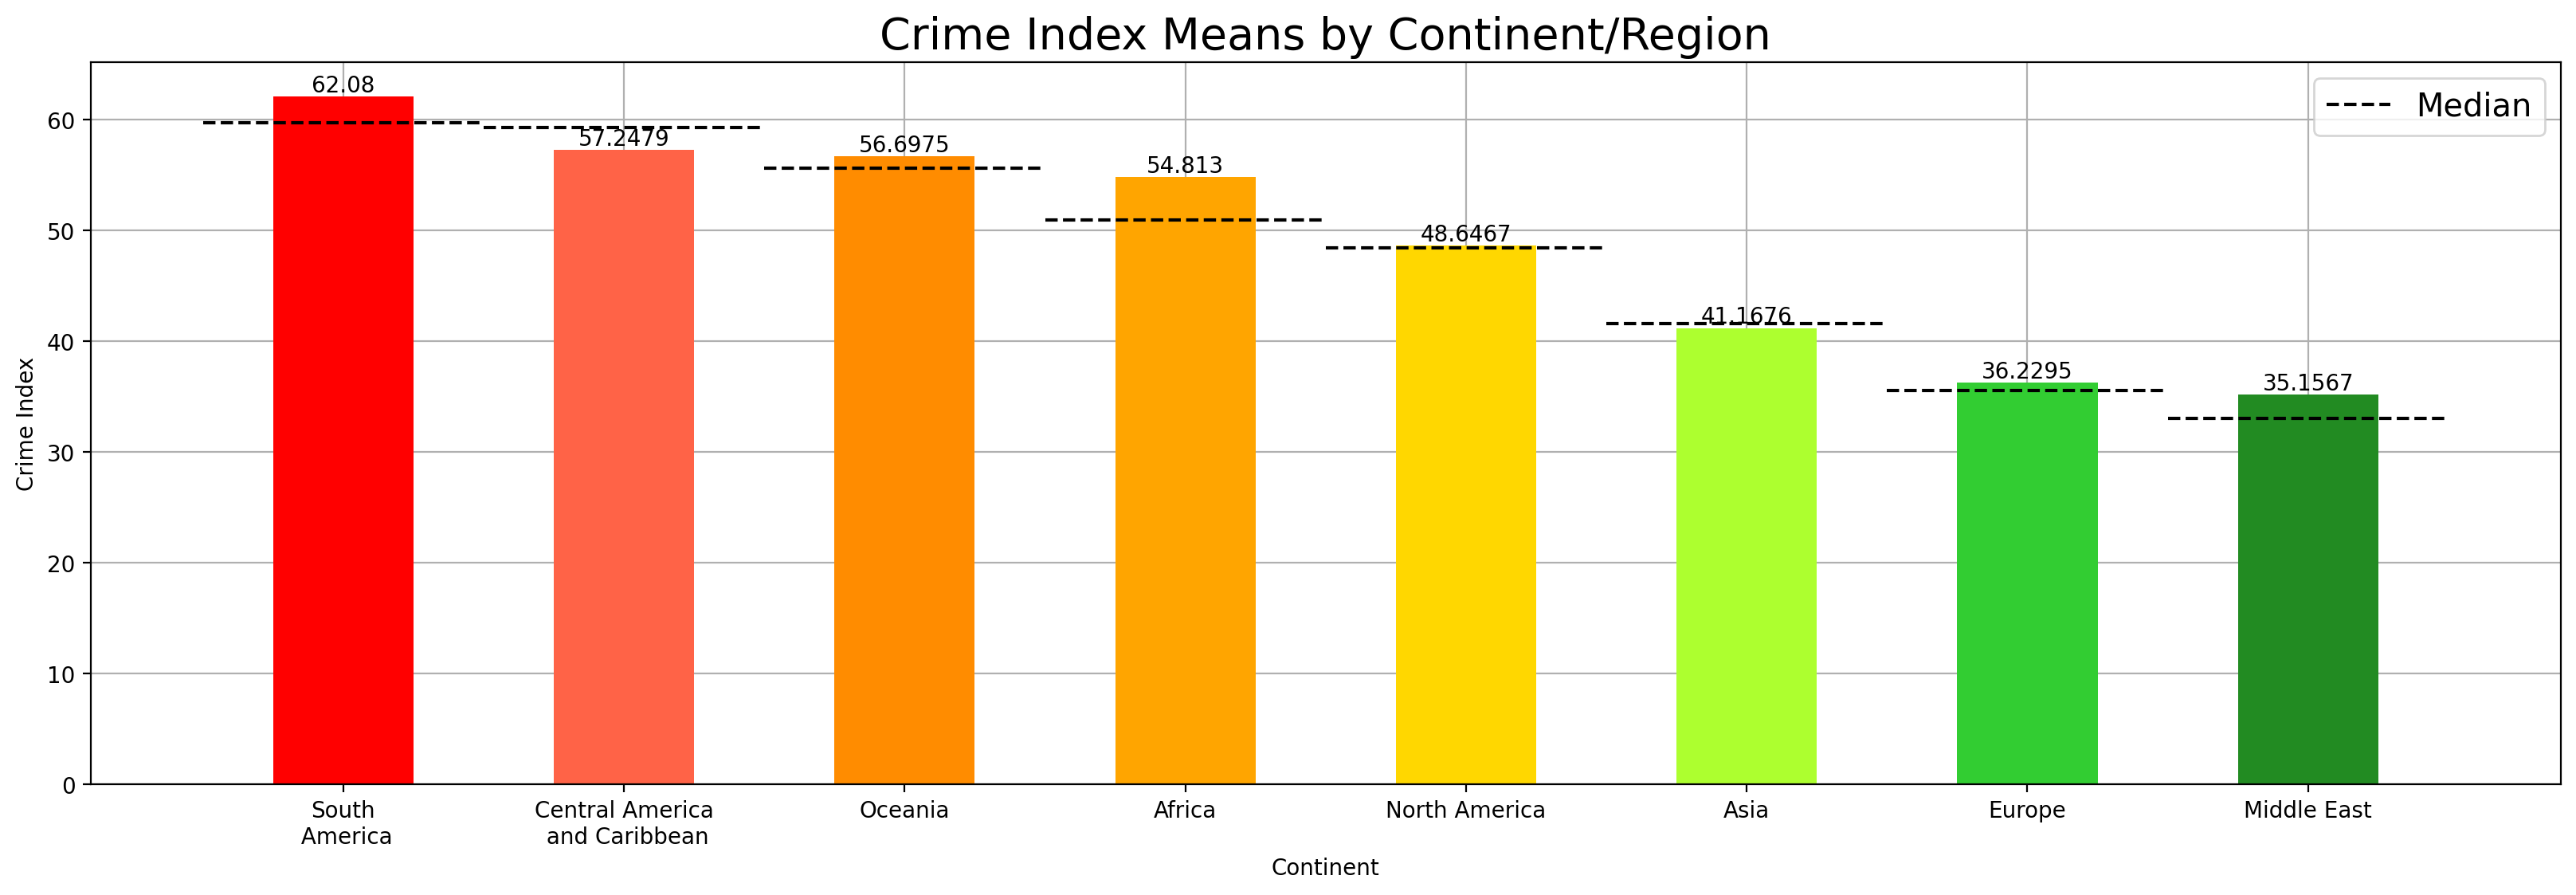

In [8]:
%matplotlib inline
figure = plt.figure(figsize=(20,6),dpi=200)
ax = figure.add_subplot(111)
ax.set_title('Crime Index Means by Continent/Region',fontsize=20)
ax.set_xticks([0,1,2,3,4,5,6,7],labels=['South\n America','Central America\n and Caribbean','Oceania','Africa','North America','Asia','Europe','Middle East'])
ax.set_ylabel('Crime Index')
ax.set_xlabel('Continent')
ax.grid()
ax.set_axisbelow(True)
bar_graph = ax.bar(means['Crime Index'].sort_values(ascending=False).index,means['Crime Index'].sort_values(ascending=False),\
      color=['red','tomato','darkorange','orange','gold','greenyellow','limegreen','forestgreen'],width=0.5)
ax.bar_label(bar_graph)
ax.plot([0,0],[0,0],'--',color='black',label='Median')
ax.legend(loc='upper right', shadow=False, fontsize='x-large')

y = -0.5
z = 0.5
for x in list(medians['Crime Index'].sort_values(ascending=False)):
    
    if z == 1.5:
        coord_x1 = y
        coord_y1 = x +0.6

        coord_x2 = z
        coord_y2 = x +0.6
    
        plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '--',color='black')
    
        y+= 1
        z+= 1
    else:    
        coord_x1 = y
        coord_y1 = x

        coord_x2 = z
        coord_y2 = x
    
        plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '--',color='black')
    
        y+= 1
        z+= 1
plt.savefig('means_medians.png',dpi=400)        

In [9]:
freq_data = pd.DataFrame(data['Crime Index'].groupby(pd.cut(data["Crime Index"], np.arange(0, 100, 4))).count())


/var/folders/mn/2w5t0lb10yb2bkztpgsrg6z40000gn/T/ipykernel_34745/2053934624.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  freq_graph.figure.colorbar(sm,label='Crime Index level\n Green - Safe, Red - Dangerous',orientation='horizontal',\


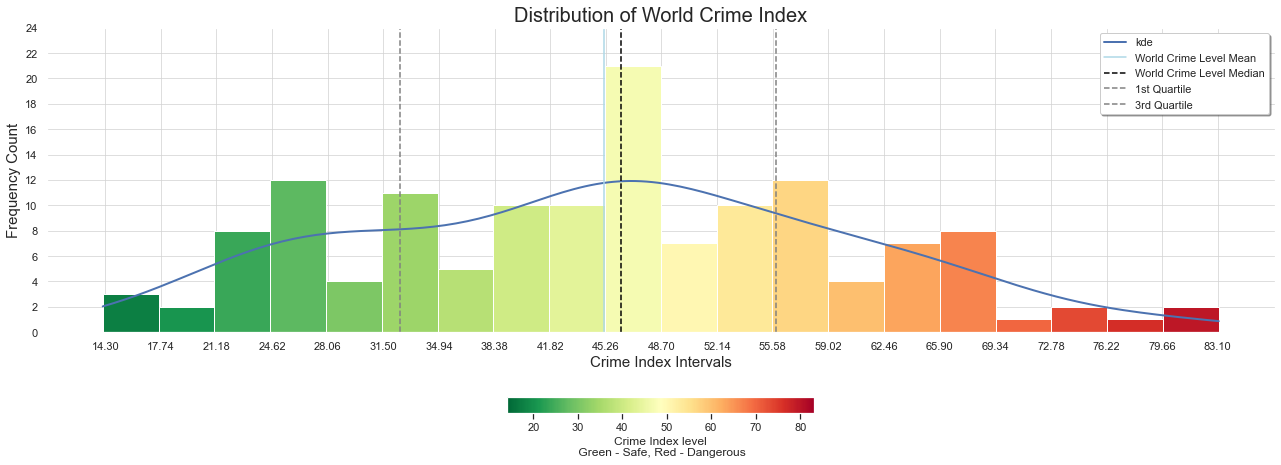

In [10]:
sns.set(rc={'figure.figsize':(22,8)})
freq_graph_colors = sns.color_palette("RdYlGn_r", 20)
freq_graph = sns.histplot(x=data['Crime Index'],palette=freq_graph_colors,bins=20,kde=True,line_kws={'color': 'purple', 'lw': 2, 'ls': '-','label':'kde'})
for i in range(20):
    freq_graph.patches[i].set_facecolor(freq_graph_colors[i])
freq_graph.set_ylabel('Frequency Count',fontsize=15)
freq_graph.set_xlabel('Crime Index Intervals',fontsize=15)
freq_graph.set_title('Distribution of World Crime Index',fontsize=20)
freq_graph.set_yticks(np.arange(0,26,2))
freq_graph.set_xticks(np.arange(14.3,83.16,3.44))
norm = plt.Normalize(data['Crime Index'].min(), data['Crime Index'].max())
cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
freq_graph.figure.colorbar(sm,label='Crime Index level\n Green - Safe, Red - Dangerous',orientation='horizontal',\
                          shrink=0.25)
freq_graph.set_facecolor('xkcd:white')
freq_graph.grid(color='lightgrey',which='both',alpha=0.75)
data_mean = data['Crime Index'].mean()
data_median = data['Crime Index'].median()
plt.axvline(data_mean,label='World Crime Level Mean',color='lightblue',linestyle='-')
plt.axvline(data_median,label='World Crime Level Median',color='black',linestyle='--')
quartiles = data['Crime Index'].quantile(q=[0.25,0.5,0.75])
plt.axvline(list(quartiles)[0],label='1st Quartile',linestyle='--',color='grey')
plt.axvline(list(quartiles)[2],label='3rd Quartile',linestyle='--',color='grey')
freq_graph.legend(shadow=True,facecolor='white')
plt.savefig('world_crime.png', dpi=400)

In [11]:
data

,Country,Crime Index,Continent,2022 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Rural % Population,2019 HDI,ppi
0,venezuela,83.16,South America,28301696.0,916445.0,30.8820,1.0036,0.35,11.675,0.711,12.72
1,papua new guinea,80.26,Oceania,10142619.0,462840.0,21.9139,1.0194,0.13,86.544,0.555,15.00
2,afghanistan,78.19,Asia,41128771.0,652230.0,63.0587,1.0257,0.52,73.686,0.511,19.12
3,south africa,75.37,Africa,59893885.0,1221037.0,49.0517,1.0084,0.75,32.153,0.709,77.84
4,honduras,74.66,Central America and Caribbean,10432860.0,112492.0,92.7431,1.0150,0.13,41.018,0.634,31.41
...,...,...,...,...,...,...,...,...,...,...,...
135,oman,19.72,Middle East,4576298.0,309500.0,14.7861,1.0123,0.06,12.956,0.813,78.78
136,isle of man,18.28,Europe,84519.0,572.0,147.7605,1.0030,0.00,46.924,0.849,80.12
137,taiwan,16.15,Asia,23893394.0,36193.0,660.1662,1.0014,0.30,21.500,0.907,61.78
138,united arab emirates,14.87,Middle East,9441129.0,83600.0,112.9322,1.0081,0.12,12.701,0.890,118.94


In [12]:
crime_var = data['Crime Index'].var()
crime_std = data['Crime Index'].std()

In [13]:
print('Variance : ',crime_var,'\nStandard Deviation : ',crime_std)

Variance :  231.41506063720453 
Standard Deviation :  15.212332517967274


In [14]:
data_correlation = data[['Crime Index','Density (per km²)','Growth Rate','Rural % Population','2019 HDI','ppi']].copy()

In [15]:
crimeindex1 = list(data_correlation['Crime Index'])
pppi = list(data_correlation['ppi'])
np.cov(np.stack((crimeindex1,pppi),axis=0),bias=True)
#data_correlation.loc[:,['Crime Index','2019 HDI']]

array([[ 229.76209592, -234.04379204],
       [-234.04379204,  798.84410212]])

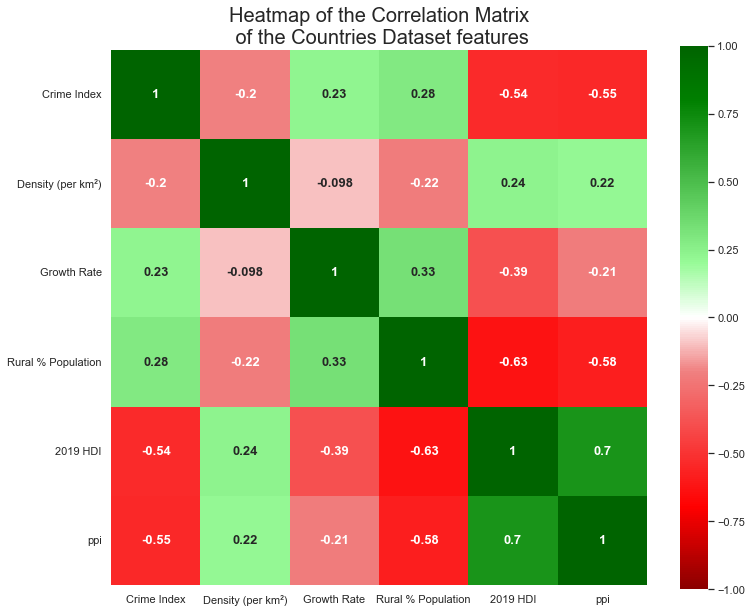

In [43]:
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap_heat=mpl.colors.LinearSegmentedColormap.from_list('rg',l, N=256)
sns.set(rc={'figure.figsize':(12,10)})
heatmap = sns.heatmap(data_correlation.corr(),cmap=cmap_heat,square=True\
                     ,vmin=-1, vmax=1,annot=True,annot_kws={'fontsize':13, 'fontweight':'bold'})

heatmap.set_title('Heatmap of the Correlation Matrix\n of the Countries Dataset features',fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0)
plt.savefig('heatmap.png',dpi=200)

In [17]:
data_correlation.corr()

,Crime Index,Density (per km²),Growth Rate,Rural % Population,2019 HDI,ppi
Crime Index,1.000000,-0.196178,0.229207,0.281273,-0.537908,-0.546295
Density (per km²),-0.196178,1.000000,-0.097776,-0.217563,0.238952,0.215438
Growth Rate,0.229207,-0.097776,1.000000,0.328168,-0.389195,-0.213036
Rural % Population,0.281273,-0.217563,0.328168,1.000000,-0.632528,-0.583323
2019 HDI,-0.537908,0.238952,-0.389195,-0.632528,1.000000,0.699025
ppi,-0.546295,0.215438,-0.213036,-0.583323,0.699025,1.000000
